In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tables
%matplotlib inline

In [2]:
!ls *output*

output-190420-163401.npz  output.npz
output-190420-193151.npz  sgd-output-190421-020626.npz
output-190420-235927.npz  sgd-output-190422-213526.npz
output-190422-213929.npz  sgd-output-190426-193015.npz


In [4]:
h5file = tables.open_file('sample.h5', 'r')
h5node = h5file.get_node("/spectra")

spectra = h5node[:]['spectrum']
normalized_spectra = spectra / np.max(spectra, axis=1)[:, np.newaxis]

h5file.close()

In [3]:
file = np.load('sgd-output-190422-213526.npz')
#NUM_SPECTRA, BATCH_SIZE, NUM_FEATURES, LEARNING_RATE = file['metadata']
#NUM_SPECTRA, NUM_FEATURES, LEARNING_RATE = file['metadata']
a_star = file['a_star']
b_star = file['b_star']

In [147]:
def recreate(a_star, b_star, index):
    return np.matmul(a_star, b_star)[index]

In [148]:
from scipy.signal import savgol_filter
def denoise(spectra):
    return savgol_filter(spectra, 101, 2)

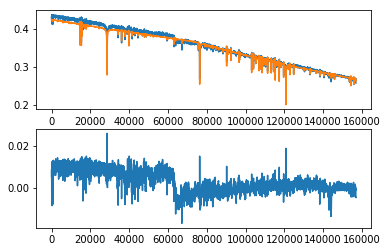

In [168]:
num_cols = len(normalized_spectra[0])
start = int(.5 * num_cols)
stop = int(.6 * num_cols)
index = 3

recreation = recreate(a_star, b_star, index)
original = normalized_spectra[index]

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(denoise(recreation[start:stop]))
ax1.plot(denoise(original[start:stop]))
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(denoise(recreation[start:stop] - original[start:stop]))

In [153]:
brows_by_importance = []
rel_importance = abs(a_star) / abs(a_star).sum(axis=1)[:, np.newaxis]
avg_rel_importance = np.mean(rel_importance, axis=0)
for brow, importance in sorted(enumerate(avg_rel_importance), key=lambda x: abs(x[1]), reverse=True):
    print(brow, '\t', round(importance, 2))
    brows_by_importance.append(brow)

6 	 0.17
3 	 0.16
4 	 0.15
0 	 0.14
2 	 0.14
1 	 0.13
5 	 0.12


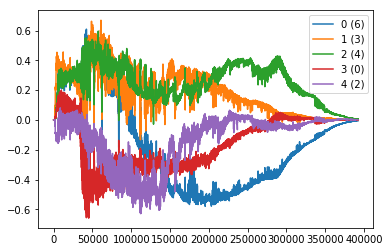

In [154]:
for i in range(5):
    plt.plot(denoise(b_star[brows_by_importance[i]]),
             label='{} ({})'.format(i, brows_by_importance[i]))
plt.legend()